# 데이터 분석 분류
1. 이미 일어난 현상을 이해(Descriptive Analysis)
  - 탐색(과정)
  - 요약(집계)
  - 변수간의 관계, 패턴 파악(머신러닝이 사용되기도함)
  - 실험설계(ex예산이 이만큼인데 어떻게 어디에 투자해야되나? 데이터로분석)

2. 앞으로 일어날 현상을 예측(머신러닝의 대표적 목적)
(Predictive Analysis)


# 지표 만들기
하나의 기준. 결과가 잘됐다, 못됐다의 기준

공식이 있는건 아님, 스스로가 지표를 세워야

좋은 지표는 비즈니스의 나침반이 될 수 있고, 비지니스의 문제및 현황을 빠르게 파악할 수 있다.
(갑자기 매출이 잘나와? 떨어졌어 > 거기에 맞게 분석)

## 좋은 지표란?
- 좋은 지표는 이해하기 쉽다
- 좋은치표 = 사람들이 이해하기 쉽고 직관적어야한다. 이를 통해 행동을 하게 만들어야 한다.

- 우리 회사의 이번 목표는( 구매전환율 * 0.75 / 이탈률 * 0.1)^2
    - 좋은지표 아님X
- 우리는 이번에 구매전환율을 KPI(핵심 성과 지표)로 삼고, 전환율을 높이는데 집중하겠습니다.
    - 좋은 지표! 과정 목표 분명하고 이해하기 쉬움


## 좋은 지표는 상대적이다
- 단순히 집계한 데이터보다 기간별, 사용자그룹별, 경쟁자 별로 비교할 수 있으면 상황을 이해하기 좋다.
- ex) 8월달 유저수가 10000이다. 많은지 적은지 모름 상대적으로 비교해야!
- 8월달 1달간 사용자 수는 1만명이며, 지난 7월 대비 20% 증가했다.( 뒤에 비교할 수 있는 말 넣어주면 좋음)

## 좋은 지표는 비율로 포현된다.
- 이탈한 고객수가 100명입니다. X
-8월달 신규 고객 수 대비 이탈 고객수의 비중은 1%입니다. O

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 그래프 크기 고정
plt.rcParams["figure.figsize"] = (12, 9)

# 음수 기호가 깨지는 것을 방지
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 코드로 마운트 가능
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/멀티캠퍼스 9회차 I반/05데이터 분석/event_log.csv")
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [ ]:
df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    236219
brand            212364
price                 0
user_id               0
user_session        165
dtype: int64

In [ ]:
df.describe()[['price']]
# df[['price']].describe()해도됨

,price
count,885129.000000
mean,146.328713
std,296.807683
min,0.220000
25%,26.460000
50%,65.710000
75%,190.490000
max,64771.060000


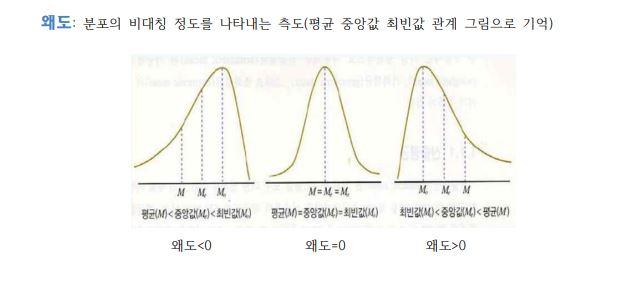

평균과 중앙값의 차이는 꽤 난다. 중앙값 << 평균

상품들 중에 굉장히 비싼 가격의 상품이 있는 것 같다.

# 유저 행동 데이터 알아보기
단순히 가입된 유저가 많다고 무조건 좋은 서비스는 아니다. 유령회원이 많을수도

## Active User
***특정기간***안에 서비스를 방문한 ***유니크한*** 사용자수

어뷰징 방지. 접속자수 조작

방문은 각 사이트마다 다르게 셀수도. 로그인을 해야 방문인지 그냥 사이트 들어오기만해도 방문인지

## Unique User
정해진 기간 내에 방문을 아무리 여러 번 했다 하더라도 실제 방문을 1번으로 카운트.

싸이월드 하루에 1명이 100명 방문 > 아무리 많이 방문했어도 유니크유저 = 1

**Daily Active User(DAU)**
- 하루(24시간)동안 방문안 Unique한 유저의 수

23:40에 들어와서 24:10에 쇼핑 > 자정을 기준으로하면 유니크유저가 2가됨.

그래서 범위를 내가 잘 잡아야함

**Weekly Active User(WAU)**
- 7일(일주일)동안 방문한 Unique한 유저의 수

**Monthly Active User(MAU)**
- 30일(한달)동안 방문한 Unique한 유저의 수

# DAU / MAU
한달 동안 사용자가 얼마나 자주 방문하는 서비스인지 알 수 있는 지표

1. DAU(의 1달평균) / MAU 가 3.3(0.033)라면?
  - MAU가 DAU보다 훨씬 크다. 같은 유저 재접속x 1달동안 새로운유저가 매일매일 유입된거. 재방문률이 낮다.⭐

2. DAU(의 1달평균) / MAU 가 100% 라면?
  - 맨날 오는사람만 오는거 매일매일 사용하는 서비스

## Active User의 장단점
**장점**
- 거의 모든 서비스에서 쉽게 구할 수 있다.
- 자주 사용되는 지표

**단점**
- 사용자의 Unique한 방문만 보기 때문에 서비스 내에 유저가 들어와서 얼마나 활발하게 활동하는지는 측정이 불가
  - 얼마나 서비스를 적극적으로 활용하는지
  - 서비스에 들어와서 구매로 전환은 되는지 등은 알기 힘들다.


# 월별, 주별, 일별 시간에 따른 유저수의 변화 살펴보기
- view 상품보기
- cart 장바구니 담기
- remove_from_cart 장바구니에서 제거
- purchase 구매하기

In [ ]:
## DAU구하기!
df[["event_time"]].head()

# 문자데이터니까 datetime으로 형변환하기 시간은 버리고 일자만 뽑을거

,event_time
0,2020-09-24 11:57:06 UTC
1,2020-09-24 11:57:26 UTC
2,2020-09-24 11:57:27 UTC
3,2020-09-24 11:57:33 UTC
4,2020-09-24 11:57:36 UTC


In [ ]:
# 시리즈 뒤에 .str을 붙이면 시리즈내의 각 데이터를 문자열처럼 취급할 수 있다.
df["event_date"] = df["event_time"].str[:10]
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020-09-24
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-24
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020-09-24
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020-09-24
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020-09-24


In [ ]:
df["event_date_dtm_format"] = pd.to_datetime(df["event_date"]) #⭐⭐pd.to_datetime

df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020-09-24,2020-09-24
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-24,2020-09-24
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020-09-24,2020-09-24
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020-09-24,2020-09-24
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020-09-24,2020-09-24


In [ ]:
# 9월 데이터 날리기
# 보기 편하게 10월 1일 이후 데이터만 사용할거!
df = df.loc[df["event_date"] > '2020-09-30']
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01


# nunique()

In [ ]:
# nunique 함수를 이용해 중복되지 않은 카운트 셀 수 있음
# 1112223334444 > nunique하면 4나옴
# user_id에 적용시킬거임! unique한 유저가 몇명인가

dau_data = df.groupby("event_date")["user_id"].nunique() #⭐⭐⭐⭐
dau_data.head()

# 날짜별(DAU) 유니크유저 카운트 나왔당

event_date
2020-10-01    2699
2020-10-02    2559
2020-10-03    2162
2020-10-04    2398
2020-10-05    2832
Name: user_id, dtype: int64

In [ ]:
dau_data =  dau_data.to_frame()
dau_data.head()

# 보기편하게 frame형태로 바꿔보기!

,user_id
event_date,
2020-10-01,2699
2020-10-02,2559
2020-10-03,2162
2020-10-04,2398
2020-10-05,2832


In [ ]:
dau_data = dau_data.rename(
    columns = {"user_id" : "user_count"}
)

dau_data.head()

,user_count
event_date,
2020-10-01,2699
2020-10-02,2559
2020-10-03,2162
2020-10-04,2398
2020-10-05,2832


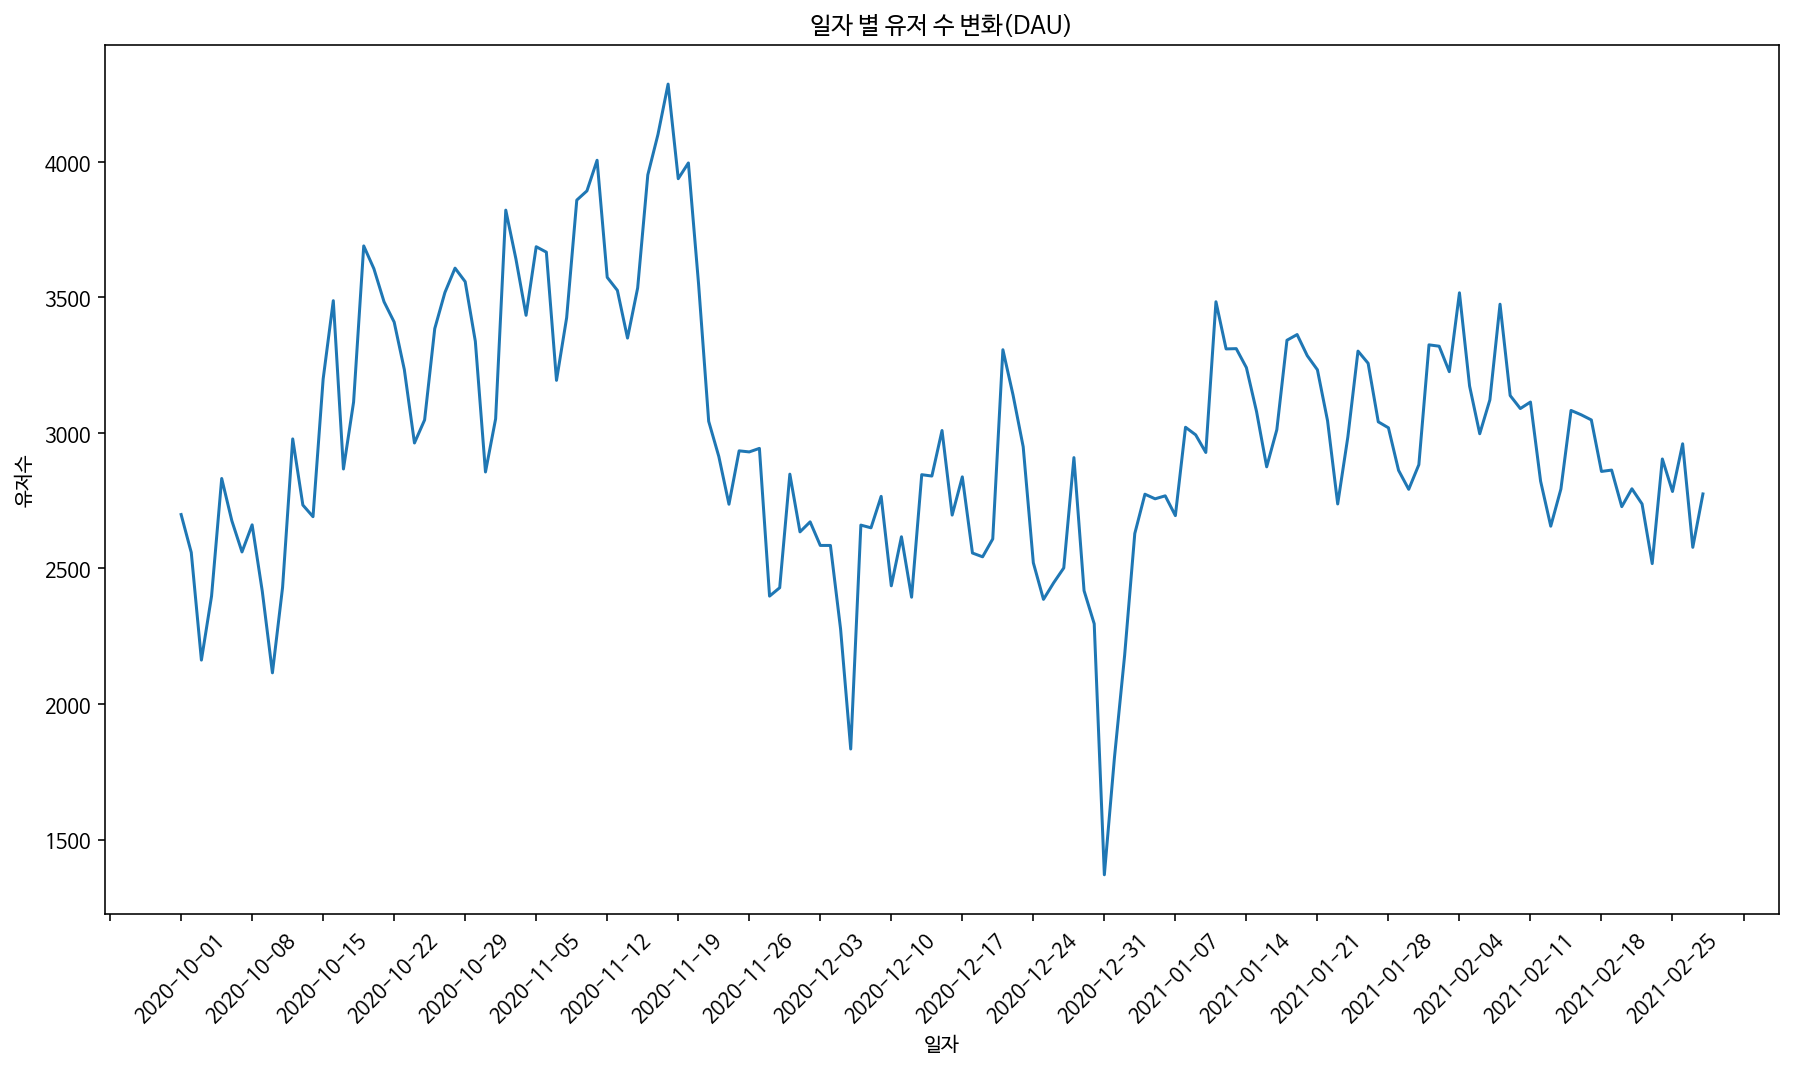

In [ ]:
import matplotlib.ticker as ticker

# g:그래프
g= sns.lineplot(x="event_date", y="user_count", data=dau_data)

# 그래프의 가로세로길이를 인치단위로 수정
g.figure.set_size_inches(15,8)

# x축에있는 ticks 눈금크기를 7배로보겠다. 7일에 한번 나오게. 10/1 10/2 10/3 이러면 너무 촘촘하니까
g.xaxis.set_major_locator(ticker.MultipleLocator(7)) # 축의 간격을 7배로 설정

g.set_title("일자 별 유저 수 변화(DAU)")
g.set_xlabel("일자")
g.set_ylabel("유저수")

plt.xticks(rotation=45)
plt.show()


In [ ]:
# Weekly Active User(WAU)구하기
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01


In [ ]:
# n주차 구하기: %U 포맷을 이용해서 가능 n주차⭐⭐
df["year_week_number"] = df["event_date_dtm_format"].dt.strftime("%Y-w%U") # %U 주차
df[["year_week_number", "event_date"]]

# 10/1은 2020년 39주차

,year_week_number,event_date
28074,2020-w39,2020-10-01
28075,2020-w39,2020-10-01
28076,2020-w39,2020-10-01
28077,2020-w39,2020-10-01
28078,2020-w39,2020-10-01
...,...,...
885124,2021-w09,2021-02-28
885125,2021-w09,2021-02-28
885126,2021-w09,2021-02-28
885127,2021-w09,2021-02-28


In [ ]:
df2 = df.groupby("year_week_number")["user_id"].nunique()
df2_2 = df2.to_frame().reset_index()
df2_2

,year_week_number,user_id
0,2020-w39,7141
1,2020-w40,16633
2,2020-w41,19305
3,2020-w42,22179
4,2020-w43,21956
5,2020-w44,23126
6,2020-w45,24038
7,2020-w46,25600
8,2020-w47,18586
9,2020-w48,16773


In [ ]:
wau_data = df2_2.rename(
    columns = {"user_id" : "user_count"}
)

wau_data.head()

,year_week_number,user_count
0,2020-w39,7141
1,2020-w40,16633
2,2020-w41,19305
3,2020-w42,22179
4,2020-w43,21956


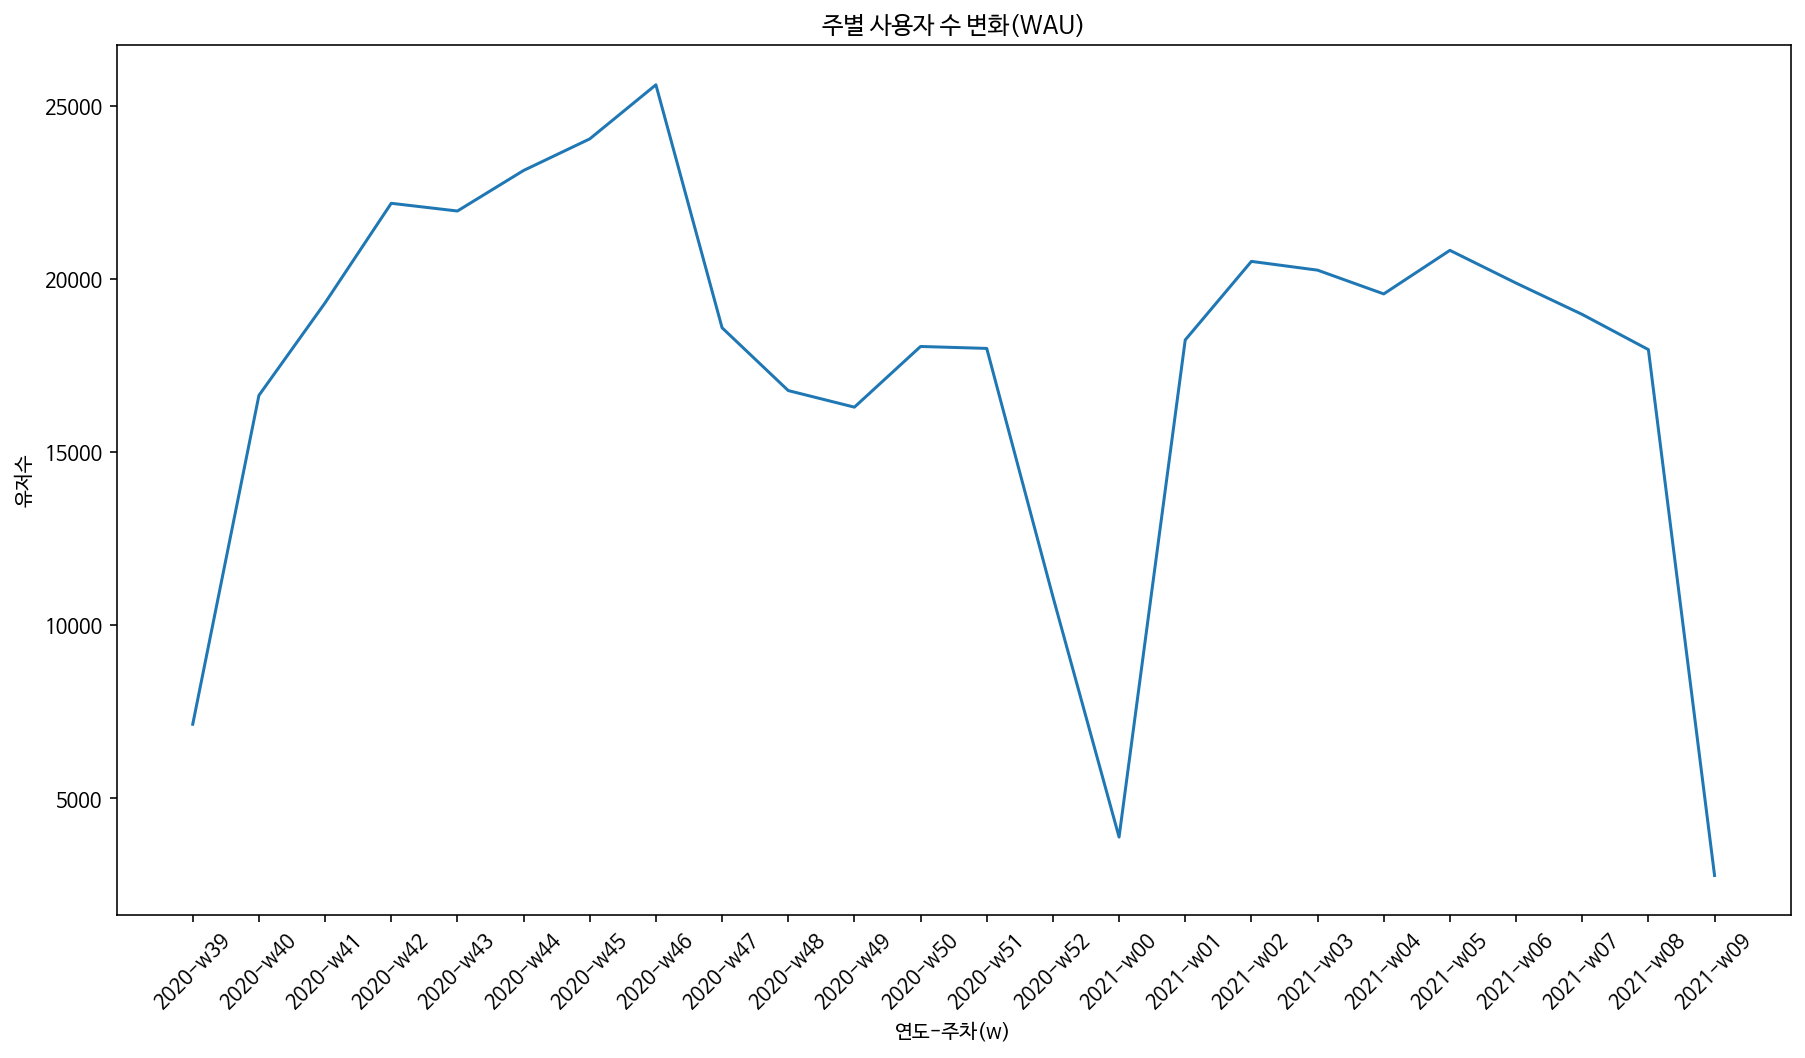

In [ ]:
# g : 그래프(시각화 객체체)
g = sns.lineplot(x='year_week_number', y='user_count', data=wau_data)

# 그래프의 가로 세로 길이를 인치 단위로 수정정
g.figure.set_size_inches(15, 8)

g.set_title("주별 사용자 수 변화(WAU)")
g.set_xlabel("연도-주차(w)")
g.set_ylabel("유저수")

plt.xticks(rotation=45)
plt.show()

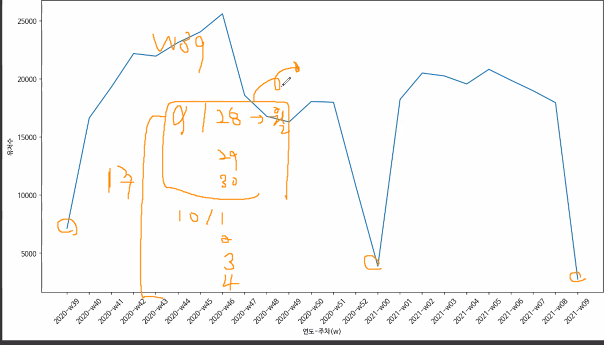

9/28~10/4가 39주찬데 지금 10월단위 11월단위로 끊어놔서 데이터들이 빠졌을수도있다. 그래서 양끝값이 작게 나오는걸수도 ㅎ

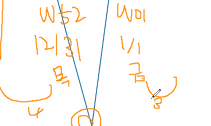

가운데는 1/1부터는 새로운년도 1주차로들어가서

In [ ]:
# 주별 날들의 합을 구해보기 > 주차별 일수
# 일주가 7일이 맞니?

df3 = df.groupby('year_week_number')["event_date"].nunique()
df3

year_week_number
2020-w39    3
2020-w40    7
2020-w41    7
2020-w42    7
2020-w43    7
2020-w44    7
2020-w45    7
2020-w46    7
2020-w47    7
2020-w48    7
2020-w49    7
2020-w50    7
2020-w51    7
2020-w52    5
2021-w00    2
2021-w01    7
2021-w02    7
2021-w03    7
2021-w04    7
2021-w05    7
2021-w06    7
2021-w07    7
2021-w08    7
2021-w09    1
Name: event_date, dtype: int64

In [ ]:
# 2021-w00을 2020-w52주차로 보낼거
df.loc[df["year_week_number"] =="2021-w00", "year_week_number"] = "2020-w52"

In [ ]:
df.groupby('year_week_number')["event_date"].nunique()

year_week_number
2020-w39    3
2020-w40    7
2020-w41    7
2020-w42    7
2020-w43    7
2020-w44    7
2020-w45    7
2020-w46    7
2020-w47    7
2020-w48    7
2020-w49    7
2020-w50    7
2020-w51    7
2020-w52    7
2021-w01    7
2021-w02    7
2021-w03    7
2021-w04    7
2021-w05    7
2021-w06    7
2021-w07    7
2021-w08    7
2021-w09    1
Name: event_date, dtype: int64

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39


In [ ]:
#2020-39와 2021-09만빼고 선택하기

df_count_under_7 = df.loc[df["year_week_number"] != '2020-w39']
df_count_under_7 = df_count_under_7.loc[df["year_week_number"] != '2021-w09']

df_count_under_7.groupby("year_week_number")["event_date"].nunique()

year_week_number
2020-w40    7
2020-w41    7
2020-w42    7
2020-w43    7
2020-w44    7
2020-w45    7
2020-w46    7
2020-w47    7
2020-w48    7
2020-w49    7
2020-w50    7
2020-w51    7
2020-w52    7
2021-w01    7
2021-w02    7
2021-w03    7
2021-w04    7
2021-w05    7
2021-w06    7
2021-w07    7
2021-w08    7
Name: event_date, dtype: int64

In [ ]:
df_count_under_7 = df_count_under_7.rename(
    columns={"user_id":"user_count"}
)
df_result = df_count_under_7.groupby("year_week_number")[["user_count"]].nunique()
df_result.reset_index()
wau_data= df_result.reset_index()
wau_data

,year_week_number,user_count
0,2020-w40,16633
1,2020-w41,19305
2,2020-w42,22179
3,2020-w43,21956
4,2020-w44,23126
5,2020-w45,24038
6,2020-w46,25600
7,2020-w47,18586
8,2020-w48,16773
9,2020-w49,16294


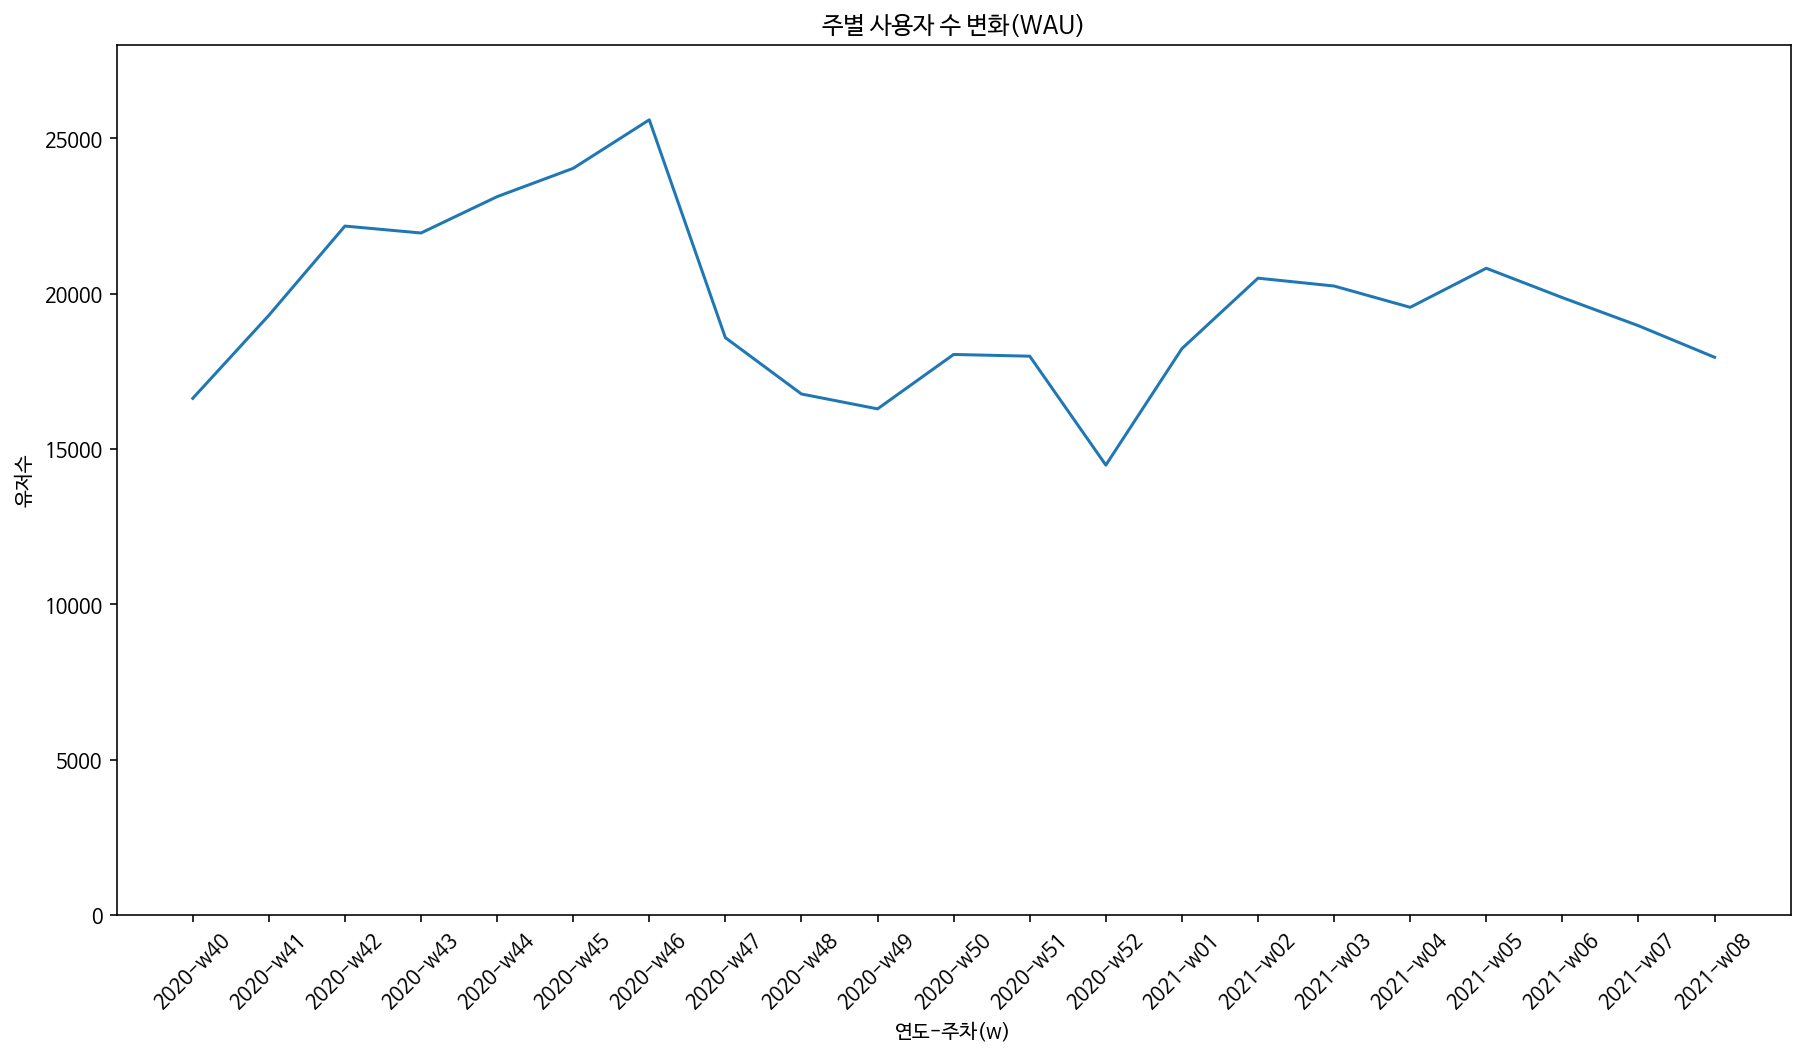

In [ ]:
# df_count_under_7을 사용해서 wau시각화

g = sns.lineplot(x='year_week_number', y='user_count', data=wau_data)
# 그래프의 가로 세로 길이를 인치 단위로 수정정
g.figure.set_size_inches(15, 8)

g.set_title("주별 사용자 수 변화(WAU)")
g.set_xlabel("연도-주차(w)")
g.set_ylabel("유저수")


g.set_ylim(0,28000)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39


# MAU해보기

In [ ]:
df["month"] = df["event_date_dtm_format"].dt.strftime("%Y-%m")
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number,month
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39,2020-10
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39,2020-10
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39,2020-10


In [ ]:
mau_data = df.groupby("month")[["user_id"]].nunique().reset_index()
mau_data = mau_data.rename(
    columns={"user_id":"user_count"}
)
mau_data

,month,user_count
0,2020-10,84216
1,2020-11,92600
2,2020-12,72137
3,2021-01,81256
4,2021-02,74606


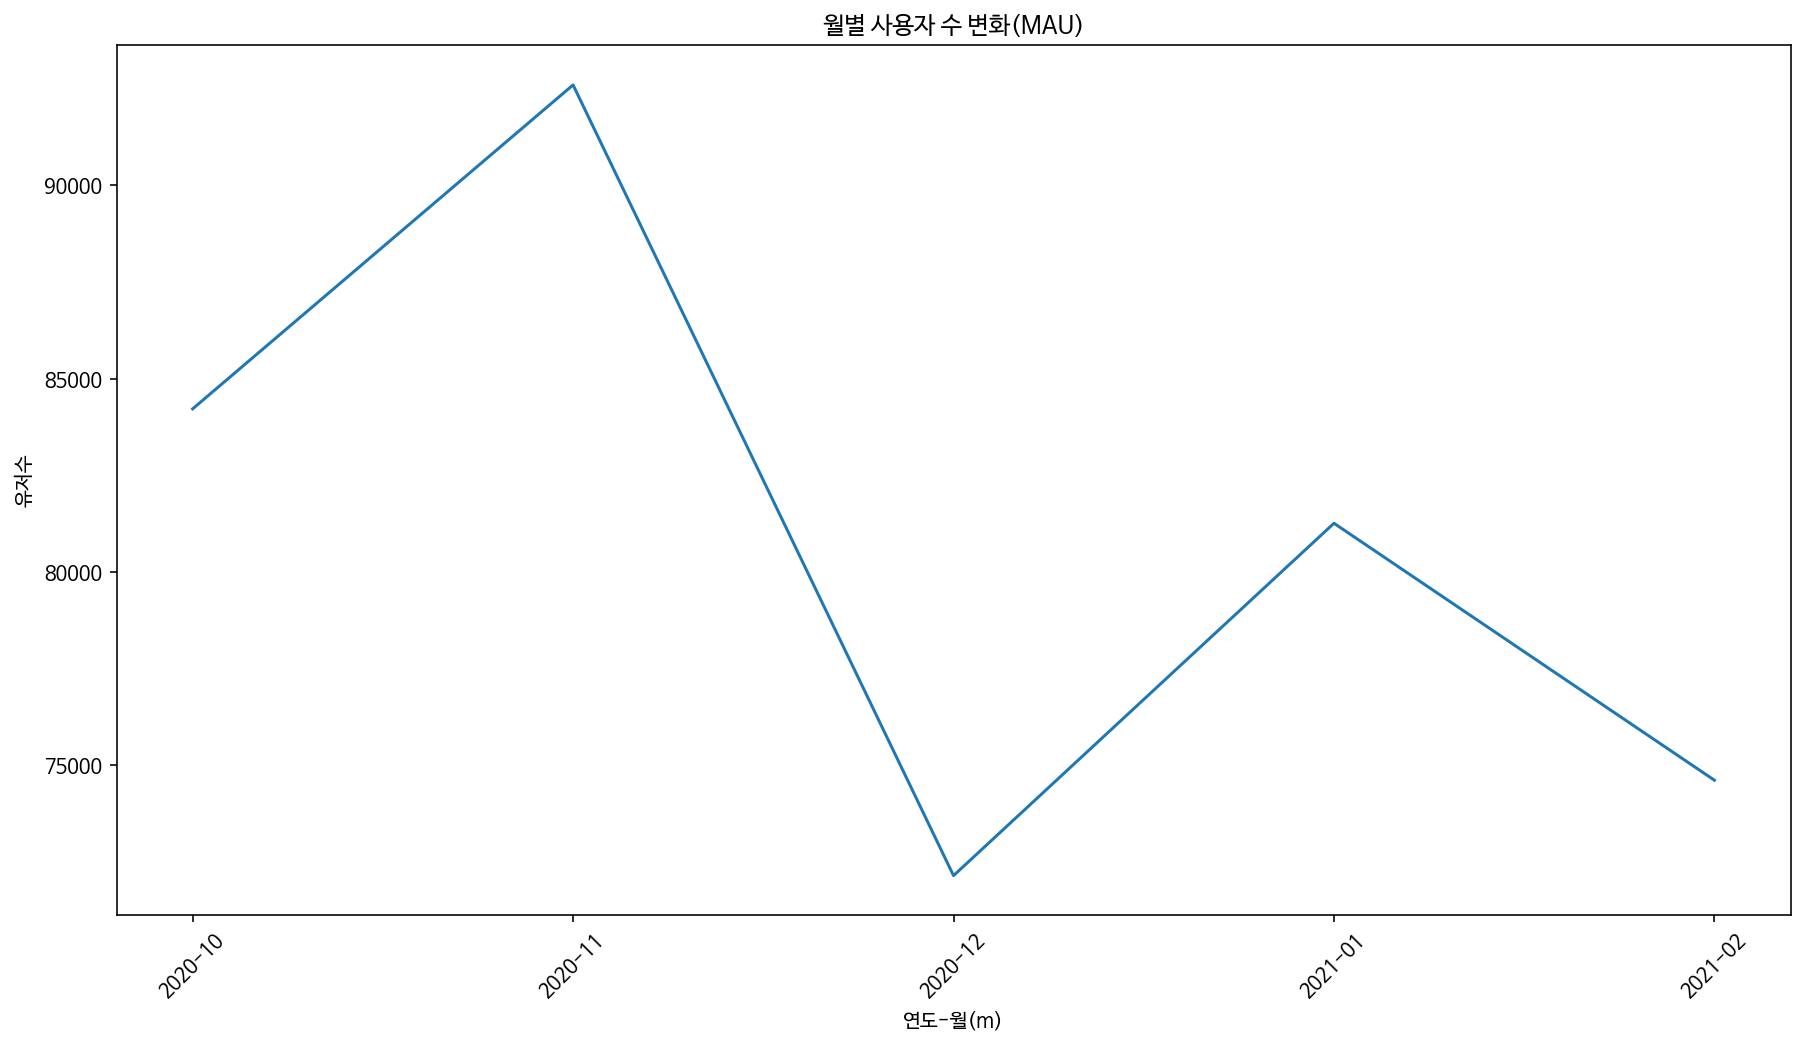

In [ ]:
g = sns.lineplot(x='month', y='user_count', data=mau_data)
# 그래프의 가로 세로 길이를 인치 단위로 수정정
g.figure.set_size_inches(15, 8)

g.set_title("월별 사용자 수 변화(MAU)")
g.set_xlabel("연도-월(m)")
g.set_ylabel("유저수")


plt.xticks(rotation=45)
plt.show()

# DAU/MAU
- 전체 DAU평균/ 전체MAU평균
    - 가지고 있는 모든 데이터를 기반으로 구하기
- 월별 DAU평균 / 해당 월의 MAU
    - 월별 구하기
    (과제)

In [ ]:
dau_data = dau_data.reset_index()
dau_data

,event_date,user_count
0,2020-10-01,2699
1,2020-10-02,2559
2,2020-10-03,2162
3,2020-10-04,2398
4,2020-10-05,2832
...,...,...
146,2021-02-24,2904
147,2021-02-25,2784
148,2021-02-26,2960
149,2021-02-27,2578


In [ ]:
mau_data

,month,user_count
0,2020-10,84216
1,2020-11,92600
2,2020-12,72137
3,2021-01,81256
4,2021-02,74606


In [ ]:
mean_daily_user = dau_data["user_count"].mean()
mean_monthly_user = mau_data["user_count"].mean()

dau_mau_ratio = mean_daily_user / mean_monthly_user

print("DAU/MAU : {:.3f}%".format(dau_mau_ratio * 100))


DAU/MAU : 3.687%


# 과제 월별구하기

In [ ]:
# dau_data에 month열 추가해준거 실수로 셀 지워버림 .dt.strftime("%y=%m")해서...


dau_data["month"] = pd.to_datetime(dau_data["event_date"])
dau_data
dau_data["month"] = dau_data["month"].dt.strftime("%Y-%m")
dau_data

,event_date,user_count,month
0,2020-10-01,2699,2020-10
1,2020-10-02,2559,2020-10
2,2020-10-03,2162,2020-10
3,2020-10-04,2398,2020-10
4,2020-10-05,2832,2020-10
...,...,...,...
146,2021-02-24,2904,2021-02
147,2021-02-25,2784,2021-02
148,2021-02-26,2960,2021-02
149,2021-02-27,2578,2021-02


In [ ]:
dau_month = dau_data.groupby("month")[["user_count"]].mean()
dau_month

,user_count
month,
2020-10,2976.677419
2020-11,3422.200000
2020-12,2590.193548
2021-01,2968.000000
2021-02,2980.928571


In [ ]:
mau_data = mau_data.set_index("month")
mau_data

,user_count
month,
2020-10,84216
2020-11,92600
2020-12,72137
2021-01,81256
2021-02,74606


In [ ]:
result = dau_month[["user_count"]] / mau_data[["user_count"]] * 100
result

,user_count
month,
2020-10,3.534575
2020-11,3.695680
2020-12,3.590659
2021-01,3.652653
2021-02,3.995561


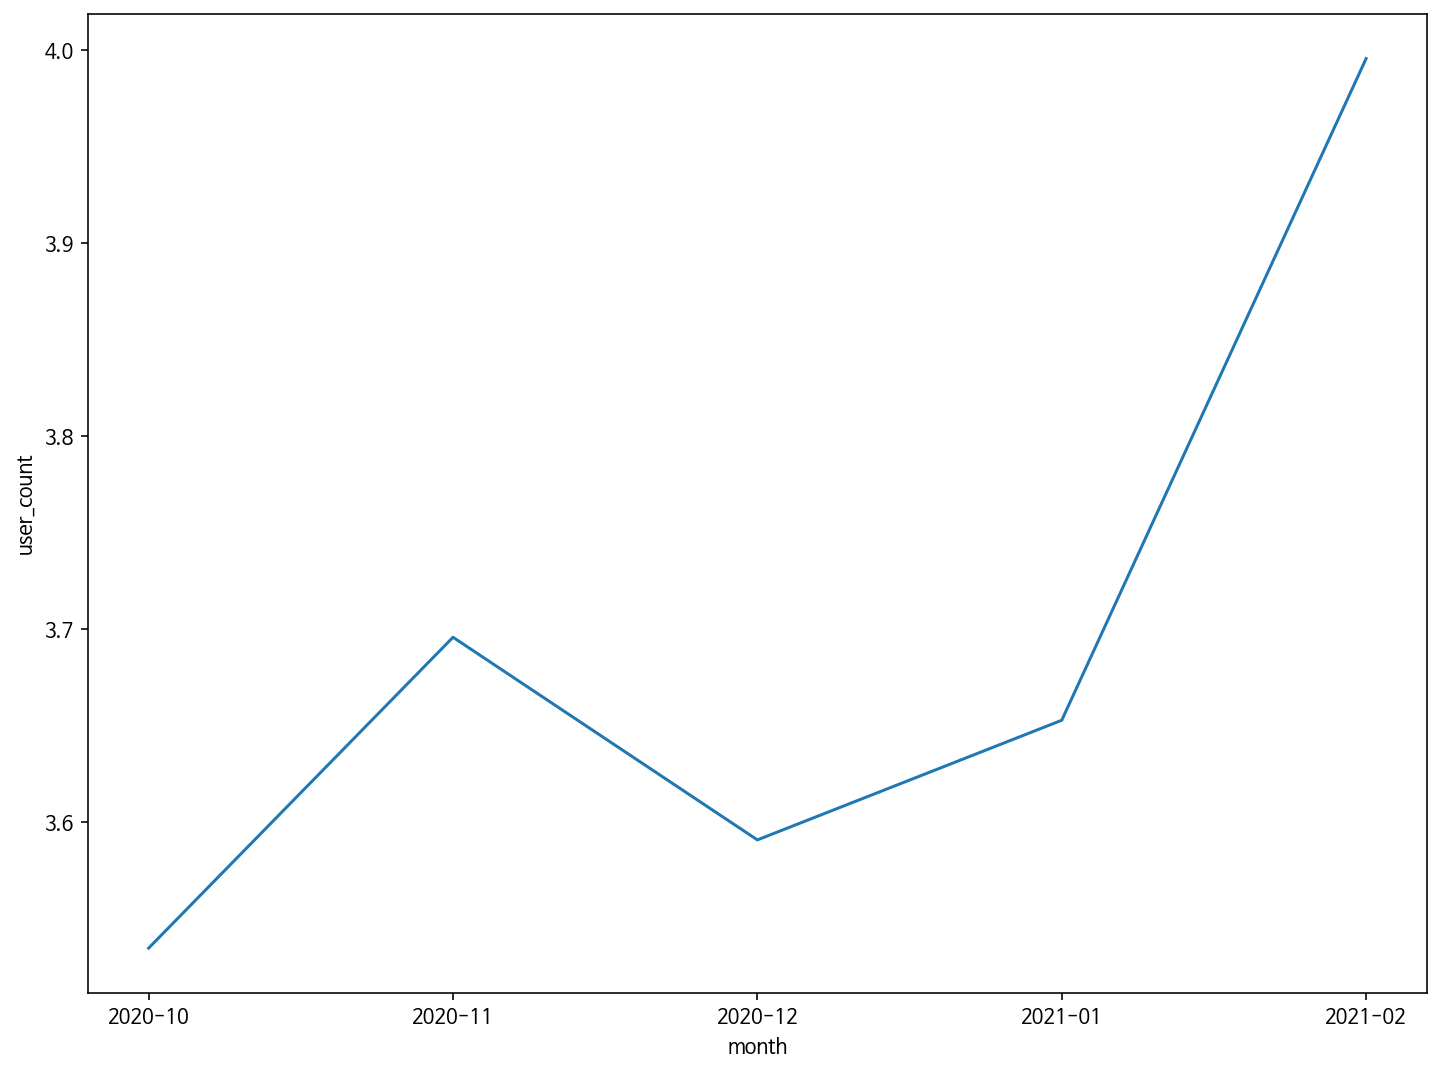

In [ ]:
# 시각화도 해보자!!
sns.lineplot(x=result.index, y="user_count", data=result)

plt.show()

# 유저수와 세션수

유저가 처음 방문해서 서비스를 사용하다가 서비스에서 나가기까지의 여정을 1세션으로 간주한다.

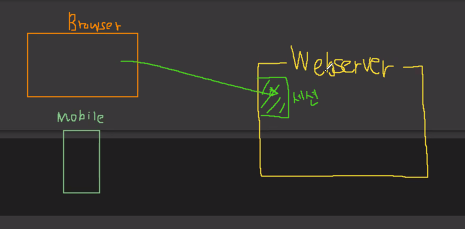

세션은 1개만들어짐. 브라우저 끄면 사라짐

ex 오전에와서 사고 저녁에와선 눈팅만했음

active user는 1명 but 세션은 2개. 창을 2번열고닫았으므로(접속한 횟수느낌)
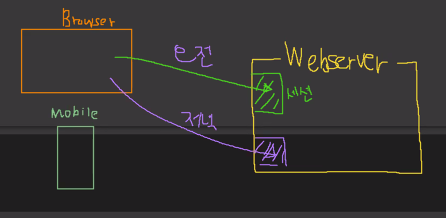

<브라우저>
유저가 서비스를 나간다는 명확한 의사 표시가 없는 경우가 많다. 그냥 페이지 틀어놓고 다른탭가서 놀고 돌아오고 등등..

만약에 무신사창키고 겜하고왔어.

마지막클릭 > 다시처음클릭 간격 30분넘는다? 그럼 새로운 세션으로 간주 = 다시 접속한걸로 간주!

핸드폰mobile은 어플리케이션창 내렸다가 다시키면 새로운 세션으로 인식

앱이 백그라운드 모드에 있다가 포그라운드 모드로 전환되면 그때부터 새 세션으로 간주

# page view 수
내가 몇개의 페이지 열어봤나

회원가입페이지 +1 > 로그인페이지 +1 > 메인페이지+1
3번!!

클릭수랑 다름. 페이지 변화안되는 클릭도 개많음

# 클릭수
같은 페이지 내에서 유저가 얼마나 많은 컨텐츠를 보는지, 어디까지 스크롤 내리는지, 체류시간등을 통해 유저의 해당 페이지에 대한 관심도 측정 가능

### 세션수와 유저수, 페이지뷰수 비교하기
- 유저수 대비 페이지뷰 수가 많다면?
  - 유저들이 서비스를 적극적으로 활동한다.
  - 건강한 서비스!
- 유저수 대비 페이지뷰 수가 적다면?
  - 유저들이 서비스를 적극적으로 활용하지 않는다.
  - 건강하지 않은 서비스..ㅠㅠ
- 유저수와 세션수가 같다면?
  - 하루에 한번 정도만 서비스를 이용한다.
- 유저수 대비 세션수, 페이지뷰가 많다면?
  - 유저가 하루에도 여러 번 방문한다.

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number,month
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39,2020-10
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39,2020-10
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39,2020-10


In [ ]:
# 일별 unique user수 (DAU)
# 세션 unique 수(1명의 유저가 몇 번 들어왔니= 세션 몇개?)
# 이벤트수 : 유저가 서비스에 들어와서 몇번의 이벤트를 발생시켰는지 보기 위함(페이지뷰)

df_unique_user_and_session = df[["user_id","user_session","event_time","event_date"]]
df_unique_user_and_session

,user_id,user_session,event_time,event_date
28074,1515915625520113390,4X2NwIInsI,2020-10-01 00:01:36 UTC,2020-10-01
28075,1515915625521278799,daM8ubpOfo,2020-10-01 00:04:11 UTC,2020-10-01
28076,1515915625521278938,EdgYsorbdC,2020-10-01 00:07:23 UTC,2020-10-01
28077,1515915625520113390,4X2NwIInsI,2020-10-01 00:07:56 UTC,2020-10-01
28078,1515915625521279091,Et4GWStGMB,2020-10-01 00:08:11 UTC,2020-10-01
...,...,...,...,...
885124,1515915625611023730,FRLqIttxKU,2021-02-28 23:55:01 UTC,2021-02-28
885125,1515915625611024014,g6WqPf50Ma,2021-02-28 23:58:05 UTC,2021-02-28
885126,1515915625611024020,xNIJBqZdkd,2021-02-28 23:58:09 UTC,2021-02-28
885127,1515915625611024030,9pCbKMIcSx,2021-02-28 23:58:14 UTC,2021-02-28


groupby에서 agg라는 함수이용하면 2개 이상의 집계를 동시에 수행 가능⭐⭐
- agg(['sum', 'mean'])

In [ ]:
df_unique_user_and_session_agg = df_unique_user_and_session.groupby("event_date").agg(['nunique','count'])
df_unique_user_and_session_agg

user_id       user_session       event_time      
           nunique count      nunique count    nunique count
event_date                                                  
2020-10-01    2699  4657         2847  4654       4500  4657
2020-10-02    2559  4555         2728  4554       4397  4555
2020-10-03    2162  3774         2271  3774       3666  3774
2020-10-04    2398  4413         2529  4413       4231  4413
2020-10-05    2832  4982         3002  4981       4790  4982
...            ...   ...          ...   ...        ...   ...
2021-02-24    2904  5803         3250  5803       5527  5803
2021-02-25    2784  5647         3113  5647       5386  5647
2021-02-26    2960  5864         3268  5864       5594  5864
2021-02-27    2578  4933         2846  4933       4736  4933
2021-02-28    2775  5268         3054  5268       5059  5268

[151 rows x 6 columns]

In [ ]:
# 1명의 유저가 1명의 세션에서 여러개의 이벤트발생.
# uni uni count가져와야
df_unique_user_and_session_agg.columns
# 멀티인덱스형태

MultiIndex([(     'user_id', 'nunique'),
            (     'user_id',   'count'),
            ('user_session', 'nunique'),
            ('user_session',   'count'),
            (  'event_time', 'nunique'),
            (  'event_time',   'count')],
           )

In [ ]:
agg = df_unique_user_and_session_agg.sort_values("event_date")
agg

user_id       user_session       event_time      
           nunique count      nunique count    nunique count
event_date                                                  
2020-10-01    2699  4657         2847  4654       4500  4657
2020-10-02    2559  4555         2728  4554       4397  4555
2020-10-03    2162  3774         2271  3774       3666  3774
2020-10-04    2398  4413         2529  4413       4231  4413
2020-10-05    2832  4982         3002  4981       4790  4982
...            ...   ...          ...   ...        ...   ...
2021-02-24    2904  5803         3250  5803       5527  5803
2021-02-25    2784  5647         3113  5647       5386  5647
2021-02-26    2960  5864         3268  5864       5594  5864
2021-02-27    2578  4933         2846  4933       4736  4933
2021-02-28    2775  5268         3054  5268       5059  5268

[151 rows x 6 columns]

In [ ]:
user_session_agg_df = pd.DataFrame(
    {"user_count" : agg[('user_id','nunique')],
     "session_count" : agg[('user_session','nunique')],
     "event_count" : agg[( 'event_time',   'count')]
     
     }
)

user_session_agg_df

,user_count,session_count,event_count
event_date,,,
2020-10-01,2699,2847,4657
2020-10-02,2559,2728,4555
2020-10-03,2162,2271,3774
2020-10-04,2398,2529,4413
2020-10-05,2832,3002,4982
...,...,...,...
2021-02-24,2904,3250,5803
2021-02-25,2784,3113,5647
2021-02-26,2960,3268,5864


In [ ]:
# 유저별 세션수 확인
# 1명의 유저가 보통 몇개의 세션 발생시키는지
# = 1명의 유저가 하루에 이 사이트에 몇 번 왔는지!

# 위의 DAU/ MAU를 보니까 한달안에 많이 들어오는 것 같지는 않음.

user_session_agg_df["session_per_user"] = user_session_agg_df["session_count"] / user_session_agg_df["user_count"]


# 세션별 이벤트수
# 한번 들어와서 몇번의 이벤트를 발생시키는지! 이 수치가 크면 한번 접속해서 대따많은 짓을 한거
user_session_agg_df["clicks_per_session"] = user_session_agg_df["event_count"] / user_session_agg_df["session_count"]

user_session_agg_df

,user_count,session_count,event_count,session_per_user,clicks_per_session
event_date,,,,,
2020-10-01,2699,2847,4657,1.054835,1.635757
2020-10-02,2559,2728,4555,1.066041,1.669721
2020-10-03,2162,2271,3774,1.050416,1.661823
2020-10-04,2398,2529,4413,1.054629,1.744958
2020-10-05,2832,3002,4982,1.060028,1.659560
...,...,...,...,...,...
2021-02-24,2904,3250,5803,1.119146,1.785538
2021-02-25,2784,3113,5647,1.118175,1.814006
2021-02-26,2960,3268,5864,1.104054,1.794370


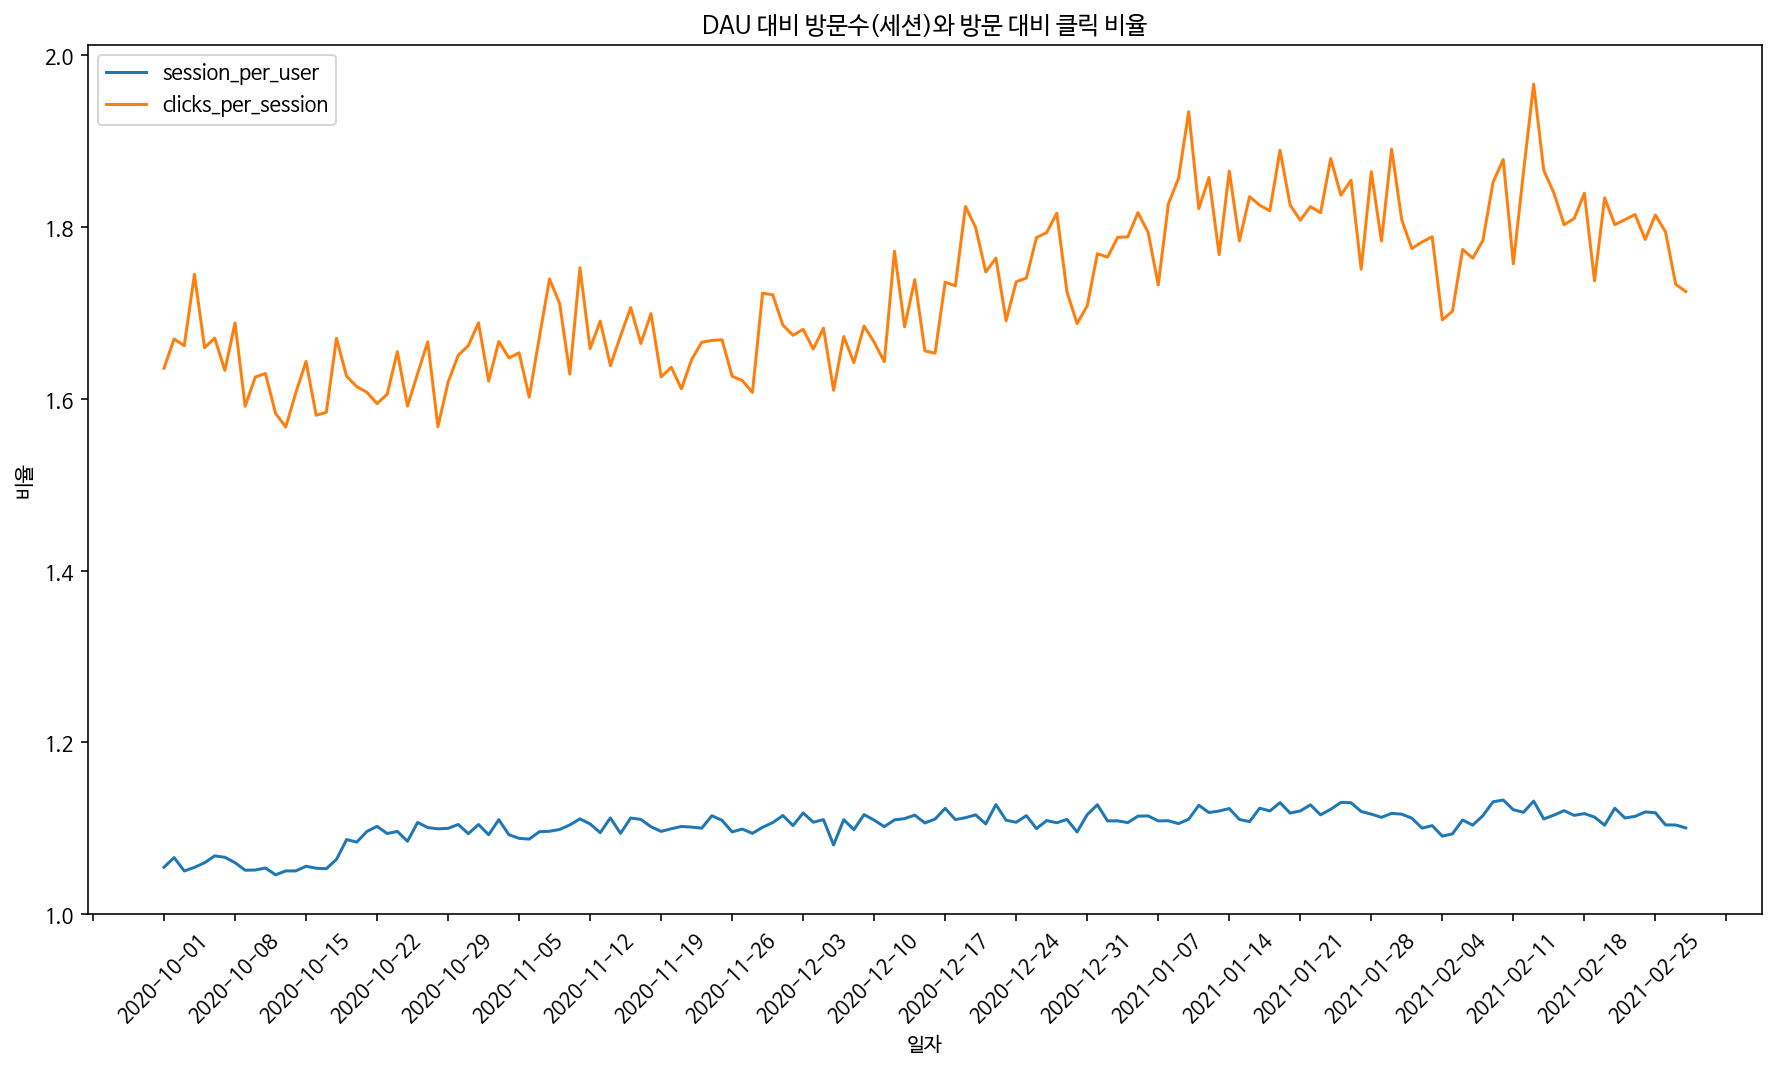

In [ ]:
g = sns.lineplot(x='event_date', y='session_per_user', data=user_session_agg_df)
g = sns.lineplot(x='event_date', y='clicks_per_session', data=user_session_agg_df)

g.figure.set_size_inches(15, 8)

g.xaxis.set_major_locator(ticker.MultipleLocator(7)) # 축의 간격을 7배로 설정

g.set_title("DAU 대비 방문수(세션)와 방문 대비 클릭 비율")
g.set_xlabel("일자")
g.set_ylabel("비율")

plt.legend(["session_per_user","clicks_per_session"])
plt.xticks(rotation=45)
plt.show()

# 코호트 분석(울타리)
  - 공통된 특성을 공유하는 집단
  - 동일 집단끼리 울타리(코호트)로 묶고, 다른 집단과 기간 별 행동이나 패턴을 비교하는 것

세로는 날짜 별 방문한 유저수, 가로는 해당 유저군의 날짜 별 재방문율

세로가 일자에대한 코호트임.(울타리)
울타리안에는 방문한 유저수

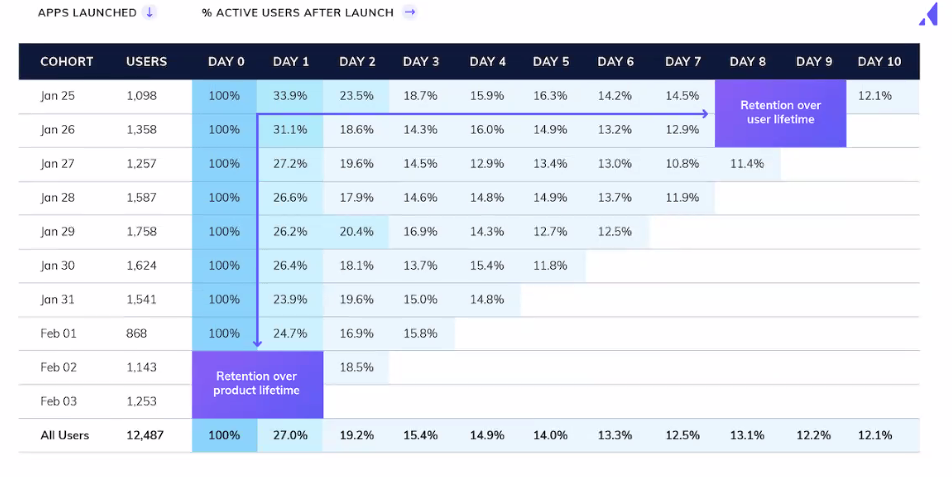

해석 : 처음 방문하는 사람이 다음날도 재방문 하는 비율이 점점 떨어지고 있다. ( 33.9 > 24.7 )

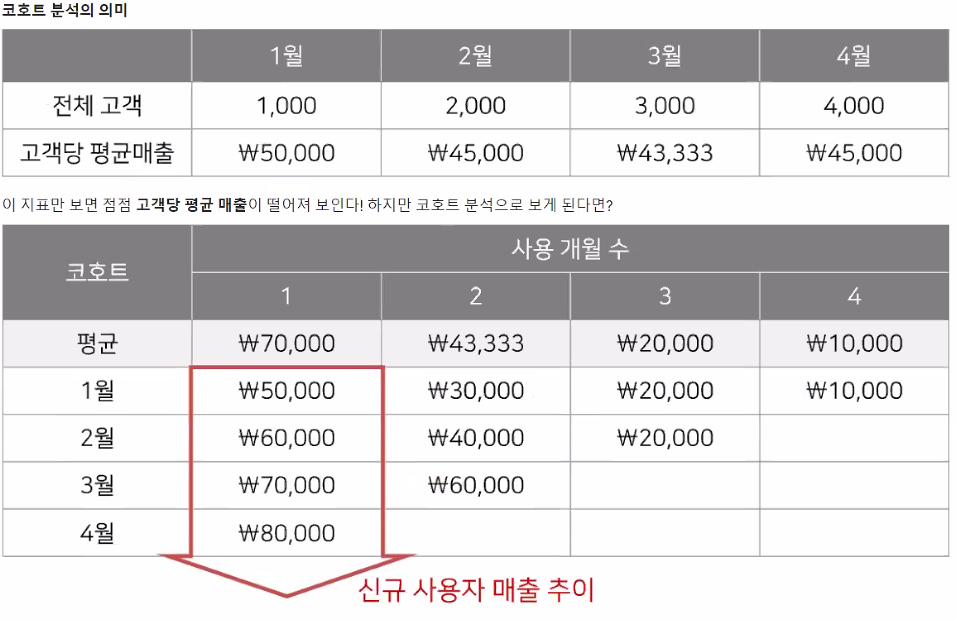

월별 집계만 하면 매출이 떨어지는 것처럼 보인다.

코호트 분석으로 보면 신규고객이 사는 금액대는 점점 증가하고있다! 1월달 신규고객은 평균 5만원쓰고 2월달 신규고객은 평균 6만원쓰고.. = 신규가입자에대한 프로모션을 잘하고있나보군

## 시간에따른 trend 추세 알 수 있다!

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number,month
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39,2020-10
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39,2020-10
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39,2020-10


# 처음 구매한 사람이 1달뒤에 재구매를 얼만큼하는지
  - 재구매율 분석

In [ ]:
# 구매 연도-월 형태의 컬럼 추가
df["order_month"] = df["event_date_dtm_format"].dt.strftime("%Y-%m")
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number,month,order_month
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10


In [ ]:
# 구매(purchase) 이벤트만 추출! 구매한 사람만 셀거임⭐

order_data = df.loc[df["event_type"] == "purchase"]
order_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number,month,order_month
28089,2020-10-01 00:16:49 UTC,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,1515915625521279407,Wxlmf9UuHZ,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28094,2020-10-01 00:21:18 UTC,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,1515915625521279407,Wxlmf9UuHZ,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28104,2020-10-01 00:31:26 UTC,purchase,1400177,2144415922528452715,electronics.telephone,NaN,19.52,1515915625521280982,EZdDgY36Lh,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28117,2020-10-01 00:39:19 UTC,purchase,1006569,2144415930019479855,electronics.telephone,NaN,12.70,1515915625521281502,wMoJBWUEvr,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28118,2020-10-01 00:39:19 UTC,purchase,1034353,2144415922528452715,electronics.telephone,NaN,28.41,1515915625521281502,wMoJBWUEvr,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10


In [ ]:
# 첫구매 기록 찾기
first_order = order_data.groupby("user_id")[["order_month"]].min()
first_order.head()

,order_month
user_id,
1515915625353286099,2020-10
1515915625353534622,2020-10
1515915625353561691,2020-11
1515915625353900095,2020-10
1515915625354561351,2020-10


In [ ]:
first_order = first_order.rename(
    columns = {"order_month" : "first_order_month"}
)

first_order.head()

,first_order_month
user_id,
1515915625353286099,2020-10
1515915625353534622,2020-10
1515915625353561691,2020-11
1515915625353900095,2020-10
1515915625354561351,2020-10


In [ ]:
order_data = order_data.set_index("user_id")
order_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,event_date,event_date_dtm_format,year_week_number,month,order_month
user_id,,,,,,,,,,,,,
1515915625521279407,2020-10-01 00:16:49 UTC,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,Wxlmf9UuHZ,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
1515915625521279407,2020-10-01 00:21:18 UTC,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,Wxlmf9UuHZ,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
1515915625521280982,2020-10-01 00:31:26 UTC,purchase,1400177,2144415922528452715,electronics.telephone,NaN,19.52,EZdDgY36Lh,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
1515915625521281502,2020-10-01 00:39:19 UTC,purchase,1006569,2144415930019479855,electronics.telephone,NaN,12.70,wMoJBWUEvr,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
1515915625521281502,2020-10-01 00:39:19 UTC,purchase,1034353,2144415922528452715,electronics.telephone,NaN,28.41,wMoJBWUEvr,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10


In [ ]:
# 기존 order_data에 첫구매월에 대한 정보 추가!
# sql 의 join on과 비슷
order_data = order_data.merge(
    first_order,
    left_index = True,
    right_index = True  # 병합할때 인덱스로 조인하겠다!
)

order_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,event_date,event_date_dtm_format,year_week_number,month,order_month,first_order_month
user_id,,,,,,,,,,,,,,
1515915625353286099,2020-10-03 11:23:44 UTC,purchase,1023383,2144415922016747613,computers.peripherals.wifi,zyxel,119.03,p5I1h2vk1T,2020-10-03,2020-10-03,2020-w39,2020-10,2020-10,2020-10
1515915625353534622,2020-10-06 10:01:55 UTC,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
1515915625353534622,2020-10-06 10:03:42 UTC,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
1515915625353534622,2020-10-06 10:29:25 UTC,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
1515915625353561691,2020-11-24 17:37:22 UTC,purchase,1507368,2144415922016747613,computers.peripherals.wifi,keenetic,172.86,UmL0qYoQh4,2020-11-24,2020-11-24,2020-w47,2020-11,2020-11,2020-11


In [ ]:
# join 끝났으니 인덱스 풀어주기
order_data = order_data.reset_index()
order_data.head()

,user_id,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,event_date,event_date_dtm_format,year_week_number,month,order_month,first_order_month
0,1515915625353286099,2020-10-03 11:23:44 UTC,purchase,1023383,2144415922016747613,computers.peripherals.wifi,zyxel,119.03,p5I1h2vk1T,2020-10-03,2020-10-03,2020-w39,2020-10,2020-10,2020-10
1,1515915625353534622,2020-10-06 10:01:55 UTC,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
2,1515915625353534622,2020-10-06 10:03:42 UTC,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
3,1515915625353534622,2020-10-06 10:29:25 UTC,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
4,1515915625353561691,2020-11-24 17:37:22 UTC,purchase,1507368,2144415922016747613,computers.peripherals.wifi,keenetic,172.86,UmL0qYoQh4,2020-11-24,2020-11-24,2020-w47,2020-11,2020-11,2020-11


In [ ]:
# 첫 구매횟수
# 첫 주문1회만센거! 중복제거하고(총 주문건수 센거아님)
cohorts = order_data.groupby(["first_order_month", "order_month"])[["user_id"]].nunique()
cohorts = cohorts.reset_index()
cohorts

,first_order_month,order_month,user_id
0,2020-10,2020-10,3796
1,2020-10,2020-11,67
2,2020-10,2020-12,17
3,2020-10,2021-01,4
4,2020-10,2021-02,4
5,2020-11,2020-11,4261
6,2020-11,2020-12,68
7,2020-11,2021-01,26
8,2020-11,2021-02,7
9,2020-12,2020-12,3784


In [ ]:
cohorts = cohorts.rename(
    columns = {
        "user_id":"total_users"
    }
)

cohorts


,first_order_month,order_month,total_users
0,2020-10,2020-10,3796
1,2020-10,2020-11,67
2,2020-10,2020-12,17
3,2020-10,2021-01,4
4,2020-10,2021-02,4
5,2020-11,2020-11,4261
6,2020-11,2020-12,68
7,2020-11,2021-01,26
8,2020-11,2021-02,7
9,2020-12,2020-12,3784


In [ ]:
# 날짜차이를 계산하기 위해 날짜타입으로 바꿔주기
cohorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   first_order_month  15 non-null     object
 1   order_month        15 non-null     object
 2   total_users        15 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 488.0+ bytes


In [ ]:
cohorts["first_order_month_dt"] = pd.to_datetime(cohorts["first_order_month"], format="%Y-%m")
cohorts["order_month_dt"] = pd.to_datetime(cohorts["order_month"], format="%Y-%m")

cohorts

,first_order_month,order_month,total_users,first_order_month_dt,order_month_dt
0,2020-10,2020-10,3796,2020-10-01,2020-10-01
1,2020-10,2020-11,67,2020-10-01,2020-11-01
2,2020-10,2020-12,17,2020-10-01,2020-12-01
3,2020-10,2021-01,4,2020-10-01,2021-01-01
4,2020-10,2021-02,4,2020-10-01,2021-02-01
5,2020-11,2020-11,4261,2020-11-01,2020-11-01
6,2020-11,2020-12,68,2020-11-01,2020-12-01
7,2020-11,2021-01,26,2020-11-01,2021-01-01
8,2020-11,2021-02,7,2020-11-01,2021-02-01
9,2020-12,2020-12,3784,2020-12-01,2020-12-01


In [ ]:
# 날짜 차이를 계산하기 위해 period 객체로 바꾼다.
#  period : 시간의 기간을 표현할 수 있는 메소드

# 1달단위로 봐서 정수형으로 확인하겠다.
cohorts["order_month_dt"].dt.to_period("M").view(int)

# 2020/10/1은 1970/1/1부터 609개월이 지났다. 50년 9개월

0     609
1     610
2     611
3     612
4     613
5     610
6     611
7     612
8     613
9     611
10    612
11    613
12    612
13    613
14    613
Name: order_month_dt, dtype: int64

# 세계 협정 시(UTC - universial time coordinate)
  1970년 1월 1일 자정이 시작

In [ ]:
# 첫 번째 구매월에서 구매 월이 몇개월 흘렀는가 계산
cohorts["order_month_dt"].dt.to_period("M").view(int) - cohorts["first_order_month_dt"].dt.to_period("M").view(int)

0     0
1     1
2     2
3     3
4     4
5     0
6     1
7     2
8     3
9     0
10    1
11    2
12    0
13    1
14    0
dtype: int64

In [ ]:
# 첫 구매월부터 몇개월이 흘렀는가!
cohorts["month_diff"] = cohorts["order_month_dt"].dt.to_period("M").view(int) - cohorts["first_order_month_dt"].dt.to_period("M").view(int)
cohorts

,first_order_month,order_month,total_users,first_order_month_dt,order_month_dt,month_diff
0,2020-10,2020-10,3796,2020-10-01,2020-10-01,0
1,2020-10,2020-11,67,2020-10-01,2020-11-01,1
2,2020-10,2020-12,17,2020-10-01,2020-12-01,2
3,2020-10,2021-01,4,2020-10-01,2021-01-01,3
4,2020-10,2021-02,4,2020-10-01,2021-02-01,4
5,2020-11,2020-11,4261,2020-11-01,2020-11-01,0
6,2020-11,2020-12,68,2020-11-01,2020-12-01,1
7,2020-11,2021-01,26,2020-11-01,2021-01-01,2
8,2020-11,2021-02,7,2020-11-01,2021-02-01,3
9,2020-12,2020-12,3784,2020-12-01,2020-12-01,0


In [ ]:
# 우리가 쓸 데이터만 추출
cols = ["first_order_month", "month_diff","total_users" ]
cohorts = cohorts[cols]
cohorts

,first_order_month,month_diff,total_users
0,2020-10,0,3796
1,2020-10,1,67
2,2020-10,2,17
3,2020-10,3,4
4,2020-10,4,4
5,2020-11,0,4261
6,2020-11,1,68
7,2020-11,2,26
8,2020-11,3,7
9,2020-12,0,3784


In [ ]:
cohorts = cohorts.set_index(["first_order_month", "month_diff"])
cohorts

# 멀티인덱스. (0인덱스,1인덱스) (2020-10, 0)

total_users
first_order_month month_diff             
2020-10           0                  3796
                  1                    67
                  2                    17
                  3                     4
                  4                     4
2020-11           0                  4261
                  1                    68
                  2                    26
                  3                     7
2020-12           0                  3784
                  1                    68
                  2                    21
2021-01           0                  4673
                  1                   117
2021-02           0                  4192

In [ ]:
 # 저대로 봐도 상관없지만 month_diff를 컬럼으로 옮기고싶음
 # long to wide 긴거를 ㅣ 옆으로 ㅡ 눕히기
 cohorts = cohorts["total_users"].unstack(1) # 1번째 인덱스를 컬럼으로 바꾸기
 cohorts

 # 접속(구매한)유저수(중복제거한거 A사람,B,C,D...) 코호트분석끝!

month_diff,0,1,2,3,4
first_order_month,,,,,
2020-10,3796.0,67.0,17.0,4.0,4.0
2020-11,4261.0,68.0,26.0,7.0,NaN
2020-12,3784.0,68.0,21.0,NaN,NaN
2021-01,4673.0,117.0,NaN,NaN,NaN
2021-02,4192.0,NaN,NaN,NaN,NaN


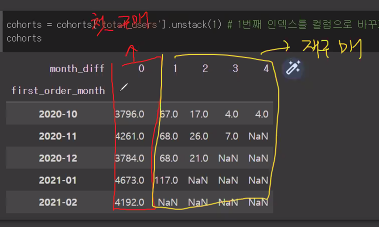

In [ ]:
# 재구매비율로보기
reorder_rate = cohorts.divide(cohorts[0], axis=0) # divide로 나눠줄거임 분모에올 숫자.
reorder_rate

month_diff,0,1,2,3,4
first_order_month,,,,,
2020-10,1.0,0.017650,0.004478,0.001054,0.001054
2020-11,1.0,0.015959,0.006102,0.001643,NaN
2020-12,1.0,0.017970,0.005550,NaN,NaN
2021-01,1.0,0.025037,NaN,NaN,NaN
2021-02,1.0,NaN,NaN,NaN,NaN


In [ ]:
reorder_rate_without_0 = reorder_rate.drop(0, axis=1)
reorder_rate_without_0

month_diff,1,2,3,4
first_order_month,,,,
2020-10,0.017650,0.004478,0.001054,0.001054
2020-11,0.015959,0.006102,0.001643,NaN
2020-12,0.017970,0.005550,NaN,NaN
2021-01,0.025037,NaN,NaN,NaN
2021-02,NaN,NaN,NaN,NaN


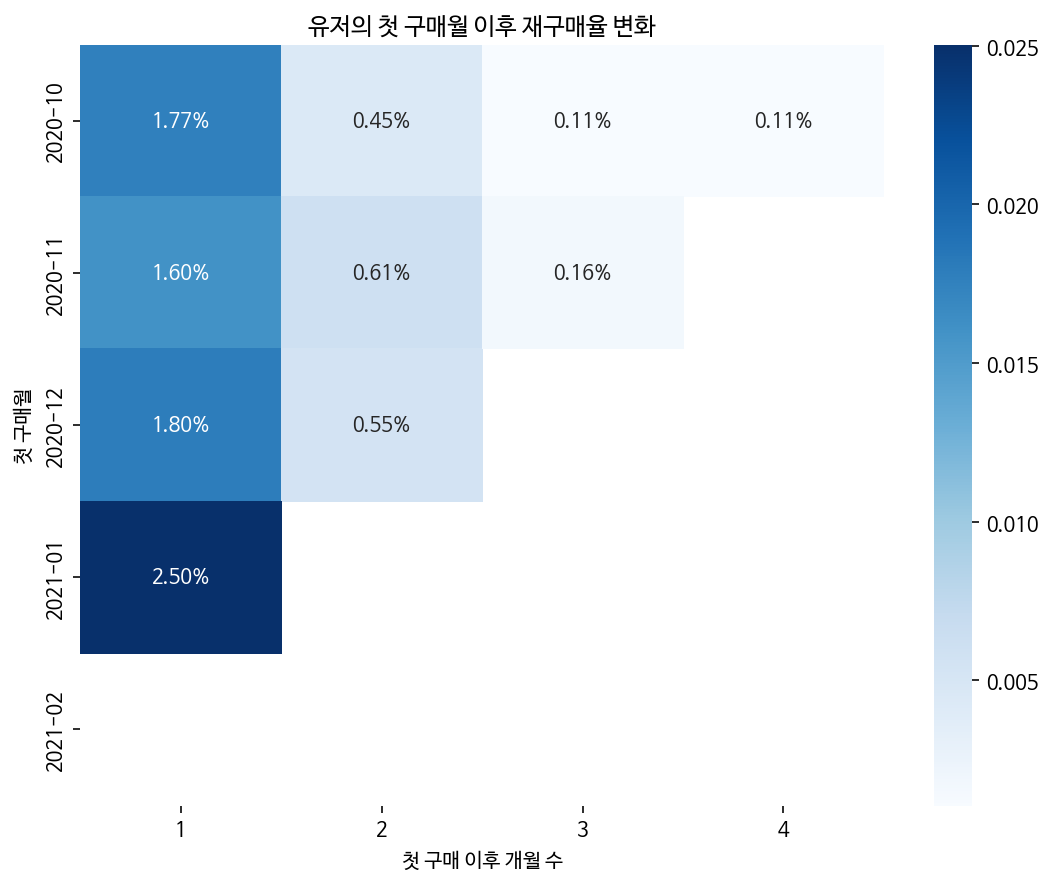

In [ ]:
g = sns.heatmap(reorder_rate_without_0, annot=True, fmt=".2%", cmap='Blues')

g.figure.set_size_inches(9, 7)
g.set_title("유저의 첫 구매월 이후 재구매율 변화")
g.set_xlabel("첫 구매 이후 개월 수")
g.set_ylabel("첫 구매월")
plt.show()

# 도전과제
재 방문율로 코호트 분석 수행해보기

지금한건 구매관련!

In [ ]:
df["event_type"].drop_duplicates()
# 뷰로 세야되낭

28074        view
28087        cart
28089    purchase
Name: event_type, dtype: object

In [ ]:
# 접속(view) 이벤트만 추출! 방문한사람만 셀거임⭐

visit_data = df.loc[df["event_type"] == "view"]
visit_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number,month,order_month
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10


In [ ]:
visit_data = visit_data.rename(
    columns = {"order_month" : "visit_month"}
)

In [ ]:
# 첫방문 기록 찾기
first_visit = visit_data.groupby("user_id")[["visit_month"]].min()
first_visit.head()

,visit_month
user_id,
1515915625353226922,2020-10
1515915625353230067,2020-10
1515915625353230683,2020-11
1515915625353230922,2020-10
1515915625353234047,2020-10


In [ ]:
first_visit = first_visit.rename(
    columns = {"visit_month" : "first_visit_month"}
)

first_visit.head()

,first_visit_month
user_id,
1515915625353226922,2020-10
1515915625353230067,2020-10
1515915625353230683,2020-11
1515915625353230922,2020-10
1515915625353234047,2020-10


In [ ]:
visit_data = visit_data.set_index("user_id")
visit_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,event_date,event_date_dtm_format,year_week_number,month,visit_month
user_id,,,,,,,,,,,,,
1515915625520113390,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
1515915625521278799,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
1515915625521278938,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
1515915625520113390,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
1515915625521279091,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10


In [ ]:
# 기존 visit_data에 첫방문월에 대한 정보 추가!
# sql 의 join on과 비슷
visit_data = visit_data.merge(
    first_visit,
    left_index = True,
    right_index = True  # 병합할때 인덱스로 조인하겠다!
)

visit_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,event_date,event_date_dtm_format,year_week_number,month,visit_month,first_visit_month
user_id,,,,,,,,,,,,,,
1515915625353226922,2020-10-29 11:28:35 UTC,view,4101974,2144415939364389423,electronics.clocks,honor,76.48,7qejzWzHlR,2020-10-29,2020-10-29,2020-w43,2020-10,2020-10,2020-10
1515915625353230067,2020-10-06 06:30:32 UTC,view,3506650,2144415935673401802,NaN,kester,28.98,ikPKHkuRhA,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
1515915625353230683,2020-11-09 08:52:51 UTC,view,124883,2144415924424278172,electronics.audio.acoustic,logitech,23.90,dn9FkZ11dA,2020-11-09,2020-11-09,2020-w45,2020-11,2020-11,2020-11
1515915625353230683,2020-11-09 09:04:34 UTC,view,760044,2144415924424278172,electronics.audio.acoustic,dell,48.73,dn9FkZ11dA,2020-11-09,2020-11-09,2020-w45,2020-11,2020-11,2020-11
1515915625353230683,2020-11-09 09:08:53 UTC,view,125325,2144415924424278172,electronics.audio.acoustic,logitech,23.90,dn9FkZ11dA,2020-11-09,2020-11-09,2020-w45,2020-11,2020-11,2020-11


In [ ]:
# join 끝났으니 인덱스 풀어주기
visit_data = visit_data.reset_index()
visit_data.head()

,user_id,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,event_date,event_date_dtm_format,year_week_number,month,visit_month,first_visit_month
0,1515915625353226922,2020-10-29 11:28:35 UTC,view,4101974,2144415939364389423,electronics.clocks,honor,76.48,7qejzWzHlR,2020-10-29,2020-10-29,2020-w43,2020-10,2020-10,2020-10
1,1515915625353230067,2020-10-06 06:30:32 UTC,view,3506650,2144415935673401802,NaN,kester,28.98,ikPKHkuRhA,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
2,1515915625353230683,2020-11-09 08:52:51 UTC,view,124883,2144415924424278172,electronics.audio.acoustic,logitech,23.90,dn9FkZ11dA,2020-11-09,2020-11-09,2020-w45,2020-11,2020-11,2020-11
3,1515915625353230683,2020-11-09 09:04:34 UTC,view,760044,2144415924424278172,electronics.audio.acoustic,dell,48.73,dn9FkZ11dA,2020-11-09,2020-11-09,2020-w45,2020-11,2020-11,2020-11
4,1515915625353230683,2020-11-09 09:08:53 UTC,view,125325,2144415924424278172,electronics.audio.acoustic,logitech,23.90,dn9FkZ11dA,2020-11-09,2020-11-09,2020-w45,2020-11,2020-11,2020-11


In [ ]:
# 첫 방문유저횟수
cohorts = visit_data.groupby(["first_visit_month", "visit_month"])[["user_id"]].nunique()
cohorts = cohorts.reset_index()
cohorts

,first_visit_month,visit_month,user_id
0,2020-10,2020-10,84108
1,2020-10,2020-11,2383
2,2020-10,2020-12,758
3,2020-10,2021-01,502
4,2020-10,2021-02,322
5,2020-11,2020-11,90163
6,2020-11,2020-12,1879
7,2020-11,2021-01,800
8,2020-11,2021-02,557
9,2020-12,2020-12,69443


In [ ]:
cohorts = cohorts.rename(
    columns = {
        "user_id":"total_users"
    }
)

cohorts

# 첫 방문1회만센거! 중복제거하고(총 방문횟수 센거아님) 같은사람이 하루에 몇번 접속했든 1개로 침

,first_visit_month,visit_month,total_users
0,2020-10,2020-10,84108
1,2020-10,2020-11,2383
2,2020-10,2020-12,758
3,2020-10,2021-01,502
4,2020-10,2021-02,322
5,2020-11,2020-11,90163
6,2020-11,2020-12,1879
7,2020-11,2021-01,800
8,2020-11,2021-02,557
9,2020-12,2020-12,69443


In [ ]:
cohorts["first_visit_month_dt"] = pd.to_datetime(cohorts["first_visit_month"], format="%Y-%m")
cohorts["visit_month_dt"] = pd.to_datetime(cohorts["visit_month"], format="%Y-%m")

cohorts

,first_visit_month,visit_month,total_users,first_visit_month_dt,visit_month_dt
0,2020-10,2020-10,84108,2020-10-01,2020-10-01
1,2020-10,2020-11,2383,2020-10-01,2020-11-01
2,2020-10,2020-12,758,2020-10-01,2020-12-01
3,2020-10,2021-01,502,2020-10-01,2021-01-01
4,2020-10,2021-02,322,2020-10-01,2021-02-01
5,2020-11,2020-11,90163,2020-11-01,2020-11-01
6,2020-11,2020-12,1879,2020-11-01,2020-12-01
7,2020-11,2021-01,800,2020-11-01,2021-01-01
8,2020-11,2021-02,557,2020-11-01,2021-02-01
9,2020-12,2020-12,69443,2020-12-01,2020-12-01


In [ ]:

cohorts["month_diff"] = cohorts["visit_month_dt"].dt.to_period("M").view(int) - cohorts["first_visit_month_dt"].dt.to_period("M").view(int)
cohorts

,first_visit_month,visit_month,total_users,first_visit_month_dt,visit_month_dt,month_diff
0,2020-10,2020-10,84108,2020-10-01,2020-10-01,0
1,2020-10,2020-11,2383,2020-10-01,2020-11-01,1
2,2020-10,2020-12,758,2020-10-01,2020-12-01,2
3,2020-10,2021-01,502,2020-10-01,2021-01-01,3
4,2020-10,2021-02,322,2020-10-01,2021-02-01,4
5,2020-11,2020-11,90163,2020-11-01,2020-11-01,0
6,2020-11,2020-12,1879,2020-11-01,2020-12-01,1
7,2020-11,2021-01,800,2020-11-01,2021-01-01,2
8,2020-11,2021-02,557,2020-11-01,2021-02-01,3
9,2020-12,2020-12,69443,2020-12-01,2020-12-01,0


In [ ]:
# 필요한 열만 추출
cohorts = cohorts[["first_visit_month","month_diff","total_users"]]
cohorts

,first_visit_month,month_diff,total_users
0,2020-10,0,84108
1,2020-10,1,2383
2,2020-10,2,758
3,2020-10,3,502
4,2020-10,4,322
5,2020-11,0,90163
6,2020-11,1,1879
7,2020-11,2,800
8,2020-11,3,557
9,2020-12,0,69443


In [ ]:
cohorts = cohorts.set_index(["first_visit_month", "month_diff"])
cohorts

total_users
first_visit_month month_diff             
2020-10           0                 84108
                  1                  2383
                  2                   758
                  3                   502
                  4                   322
2020-11           0                 90163
                  1                  1879
                  2                   800
                  3                   557
2020-12           0                 69443
                  1                  1646
                  2                   716
2021-01           0                 78214
                  1                  2157
2021-02           0                 70756

In [ ]:
cohorts = cohorts["total_users"].unstack(1) # 1번째 인덱스를 컬럼으로 바꾸기
cohorts

month_diff,0,1,2,3,4
first_visit_month,,,,,
2020-10,84108.0,2383.0,758.0,502.0,322.0
2020-11,90163.0,1879.0,800.0,557.0,NaN
2020-12,69443.0,1646.0,716.0,NaN,NaN
2021-01,78214.0,2157.0,NaN,NaN,NaN
2021-02,70756.0,NaN,NaN,NaN,NaN


In [ ]:
# 재방문비율로보기
revisit_rate = cohorts.divide(cohorts[0], axis=0) # divide로 나눠줄거임 분모에올 숫자.
revisit_rate

month_diff,0,1,2,3,4
first_visit_month,,,,,
2020-10,1.0,0.028333,0.009012,0.005969,0.003828
2020-11,1.0,0.020840,0.008873,0.006178,NaN
2020-12,1.0,0.023703,0.010311,NaN,NaN
2021-01,1.0,0.027578,NaN,NaN,NaN
2021-02,1.0,NaN,NaN,NaN,NaN


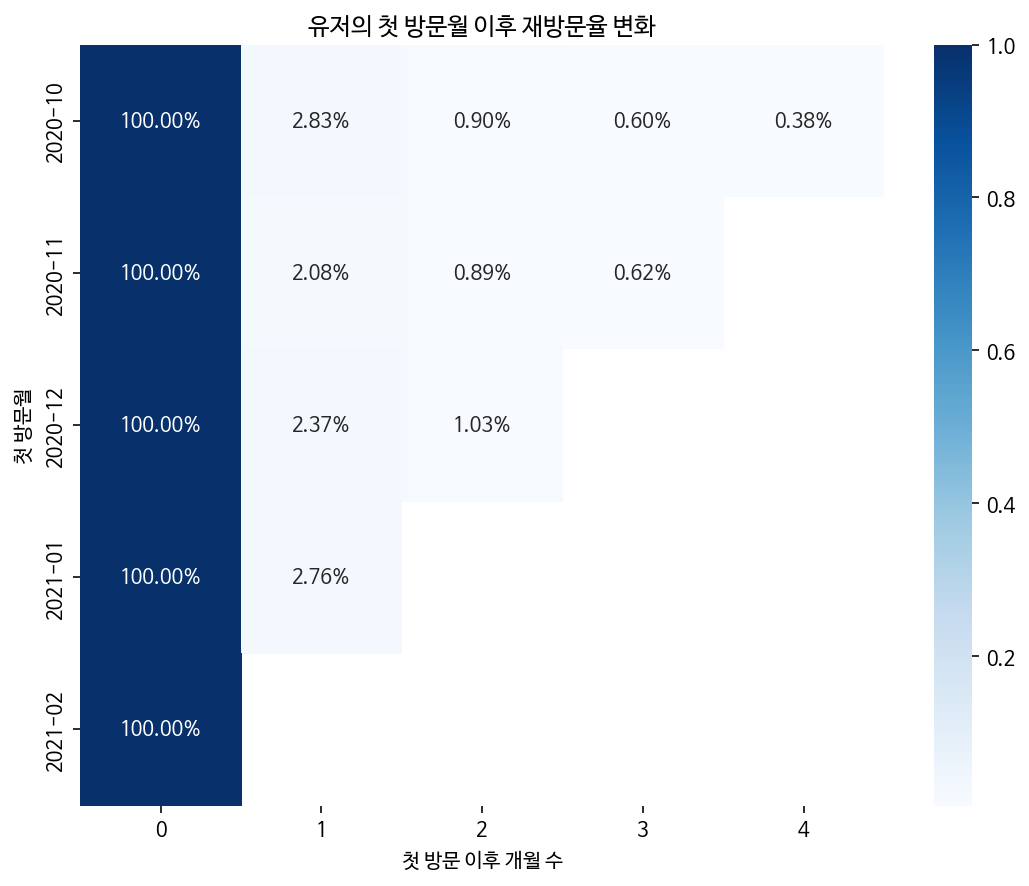

In [ ]:
g = sns.heatmap(revisit_rate, annot=True, fmt=".2%", cmap='Blues')

g.figure.set_size_inches(9, 7)
g.set_title("유저의 첫 방문월 이후 재방문율 변화")
g.set_xlabel("첫 방문 이후 개월 수")
g.set_ylabel("첫 방문월")
plt.show()